In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def read_file(file_name):
    hist = []
    hist_temp = []
    hist_conv = []
    hist_count = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == 'Time':
                if hist_count != [] and hist_conv != []:
                    hist_temp.append(hist_count) 
                    hist_temp.append(hist_conv) 
                    hist.append(hist_temp)
                hist_count = []
                hist_conv = []
                hist_temp = []
                hist_temp.append(float(line.strip('Time (s): ')))
            else:
                line = line.strip('. \n').split('	clat: ')
                hist_count.append(int(line[0]))
                hist_conv.append(int(line[1]))
        hist_temp.append(hist_count) 
        hist_temp.append(hist_conv) 
        hist.append(hist_temp)
    return hist

Start time(s):  0.9
End time(s):  1
Occurring convergence:  [59, 1, 40, 60]
Occurring probabilities:  [0.7789221077892211, 0.7789221077892211, 1.0, 0.22107789221077892]


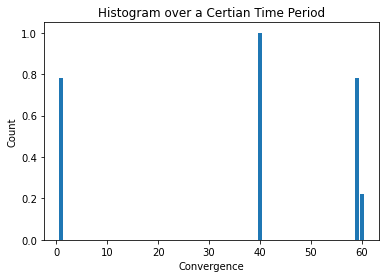

In [8]:
def hist_period(file_name):
    t_i = 0.9
    t_f = 1
    hist = read_file(file_name)
    plot_count = []
    plot_conv = []
    tot = 0
    for i in hist:
        if t_i <= i[0] <= t_f:
            tot += 1
            for j in i[2]:
                if j not in plot_conv:
                    plot_conv.append(j)
                    plot_count.append(i[1][i[2].index(j)])
                else:
                    index = plot_conv.index(j)
                    plot_count[index] += i[1][i[2].index(j)]
    plot_count_mean = []                
    for i in plot_count:
        plot_count_mean.append(i/tot)
    print('Start time(s): ', t_i)
    print('End time(s): ', t_f)
    print('Occurring convergence: ', plot_conv)
    print('Occurring probabilities: ', plot_count_mean)
    plt.bar(plot_conv, plot_count_mean)
    plt.title('Histogram over a Certian Time Period')
    plt.xlabel('Convergence')
    plt.ylabel('Count')
    plt.show()
    
if __name__ == '__main__':
    hist_period('histogram_complexes_time.dat')

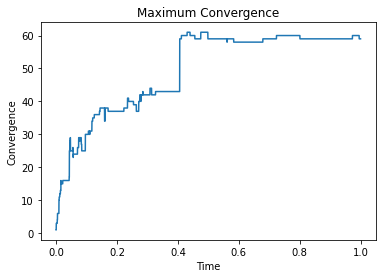

In [9]:
def hist_max(file_name):
    t_i = 0
    t_f = 1
    hist = read_file(file_name)
    plot_time = []
    plot_conv = []
    for i in hist:
        if t_i <= i[0] <= t_f:
            plot_time.append(i[0])
            plot_conv.append(max(i[2]))
    plt.plot(plot_time, plot_conv)
    plt.title('Maximum Convergence')
    plt.xlabel('Time')
    plt.ylabel('Convergence')
    plt.show()
            
if __name__ == '__main__':
    hist_max('histogram_complexes_time.dat')          

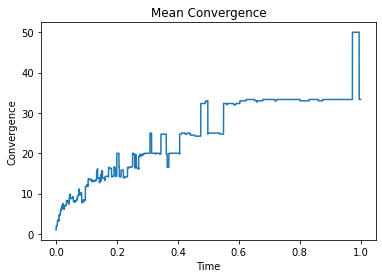

In [10]:
def hist_mean(file_name):
    t_i = 0
    t_f = 1
    hist = read_file(file_name)
    plot_time = []
    plot_conv = []
    for i in hist:
        if t_i <= i[0] <= t_f:
            plot_time.append(i[0])
            plot_conv.append(np.mean(i[2]))
    plt.plot(plot_time, plot_conv)
    plt.title('Mean Convergence')
    plt.xlabel('Time')
    plt.ylabel('Convergence')
    plt.show()
            
if __name__ == '__main__':
    hist_mean('histogram_complexes_time.dat')          